In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def locate(t,x,g=0):
    if x[g]<=t and t<=x[g+1]:
        return g
    left = 0
    right = len(x)-1
    while right>left+1:
        mid = (right+left)//2
        if t >= x[mid]:
            left = mid
        else:
            right = mid
    return left

def pwC(x,y,s):
    s = np.array(s)
    y = np.array(y)
    dx = np.diff(x)
    dy = np.diff(y)
    yp = dy/dx
    a = y[:-1]
    b = s[:-1]
    c = (yp-s[:-1])/dx
    d = (s[:-1]+s[1:]-2*yp)/(dx*dx)
    return [a,b,c,d]

def pwCEval(t,x,coef):
    ta = np.array(t)
    a,b,c,d = coef
    result = np.empty(ta.size)
    i = 0
    for tk,k in zip(ta,range(ta.size)):
        i = locate(tk,x,i)
        result[k] = d[i]*(tk-x[i+1])+c[i]
        result[k] = result[k]*(tk-x[i])+b[i]
        result[k] = result[k]*(tk-x[i])+a[i]
    return result

In [21]:
def MyCubicSpline(x,y,der=3,muL=0,muR=0):
    y = np.array(y)
    dx = np.diff(x)
    dy = np.diff(y)
    yp = dy/dx
    A = np.diag(2*(dx[1:]+dx[:-1]))+np.diag(dx[2:],-1)+np.diag(dx[:-2],1)
    b = 3*(dx[:-1]*yp[1:]+dx[1:]*yp[:-1])
    if der == 1:
        b[0]  -= dx[1]*muL
        b[-1] -= dx[-2]*muR
        s = np.linalg.solve(A,b)
        s = np.hstack((muL,s,muR))
    elif der == 2:
        bd1 = (6*yp[0]-muL*dx[0])/4
        b[0] -= dx[1]*bd1
        A[0,0] -= dx[1]/2
        bdn = (6*yp[-1]-muL*dx[-1])/4
        b[-1] -= dx[-2]*bdn
        A[-1,-1] -= dx[-2]/2
        s = np.linalg.solve(A,b)
        s = np.hstack((bd1-s[0]/2,s,bdn-s[-1]/2))
    elif der==3:
        q = dx[0]*dx[0]/dx[1]
        b[0] -= 2*(yp[0]*dx[1]-yp[1]*q)
        A[0,0] += q-dx[1]
        A[0,1] += q
        q = dx[-1]*dx[-1]/dx[-2]
        b[-1] -= 2*(yp[-1]*dx[-2]-yp[-2]*q)
        A[-1,-1] += q-dx[-2]
        A[-1,-2] += q
        s = np.linalg.solve(A,b)
        sL = 2*yp[0]-s[0]+((dx[0]/dx[1])**2)*(s[0]+s[1]-2*yp[1])
        sR = 2*yp[-1]-s[-1]+((dx[-1]/dx[-2])**2)*(s[-1]+s[-2]-2*yp[-2])
        s = np.hstack((sL,s,sR))
    else:
        print('d must be one of 1, 2 or 3')
        return None
    a = y[:-1]
    b = s[:-1]
    c = (yp-s[:-1])/dx
    d = (s[:-1] + s[1:]-2*yp)/(dx*dx)
    return a,b,c,d

In [22]:
x = np.random.rand(10)
x = np.sort(x)
y = np.random.randn(10)
x,y

(array([ 0.01158513,  0.25114688,  0.34117847,  0.46634141,  0.47093364,
         0.48012784,  0.6508196 ,  0.65838037,  0.93072706,  0.95232592]),
 array([ 1.17970905, -1.09639002, -0.77522288,  1.67175715,  0.18173861,
        -1.39785489, -0.53118793, -1.47402174,  0.09042527, -1.02373992]))

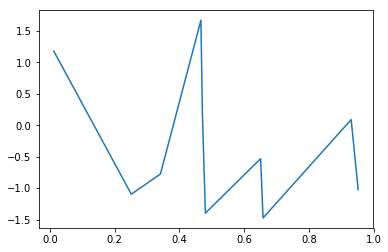

In [23]:
plt.plot(x,y)

In [24]:
coef = MyCubicSpline(x,y,der=2,muL=0,muR=0)

In [25]:
coef

(array([ 1.17970905, -1.09639002, -0.77522288,  1.67175715,  0.18173861,
        -1.39785489, -0.53118793, -1.47402174,  0.09042527]),
 array([   3.35661006,  -35.21650569,   95.63129253, -334.67075604,
        -280.85301186, -107.90504128, -116.98483579, -124.31484804,
         -39.88333243]),
 array([   -53.67177686,    430.77965397,   -607.85515678,   2222.33521235,
         11860.71714345,    661.90906322,  -1020.53184798,    477.55002497,
          -541.74693304]),
 array([ -2.24041505e+02,   6.57319262e+03,  -1.77546553e+04,
          1.58411997e+06,  -5.34129563e+05,  -8.06724498e+03,
          1.41729501e+05,  -2.36861776e+03,   1.25411010e+04]))

(-2, 2)

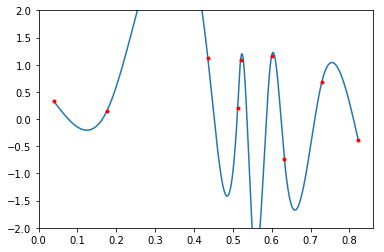

In [15]:
t = np.linspace(min(x),max(x),10000)
plt.plot(t,pwCEval(t,x,coef),x,y,'r.')
plt.ylim(-2,2)

In [16]:
coef = MyCubicSpline(x,y,der=3)

In [17]:
coef

(array([ 0.32871923,  0.15505527,  1.13059447,  0.20304457,  1.08585763,
        -2.41735083,  1.16264898, -0.73752321,  0.69061262]),
 array([ -41.66819304,   25.75958056,  -66.0356066 ,  130.72498438,
          69.82701258,  -64.7244894 ,   35.78105346,  -78.98135959,
          54.11595756]),
 array([  294.74000953,   -84.87476797,   702.32362474, -1707.19544933,
        -5026.68459859,  3141.99467824, -2832.37082297,   972.21906665,
         -703.05657731]),
 array([   -711.82607832,    -711.82607832,   15046.7801492 ,
        -630847.7584883 ,  178840.46870455,  -89479.67323681,
          66247.97615961,   -5853.91636292,   -5853.91636292]))

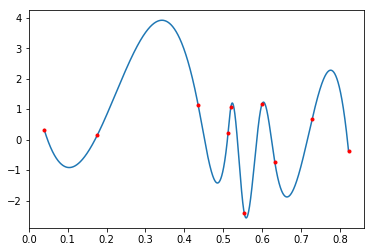

In [18]:
t = np.linspace(min(x),max(x),10000)
plt.plot(t,pwCEval(t,x,coef),x,y,'r.')
#plt.ylim(-2,2)